In [1]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

from settings_and_potential import *

In [2]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-10,10]
a=range_int[0]
b=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), a,b)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), a,b)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, a,b)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, a,b)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, a,b)[0],16)/norm

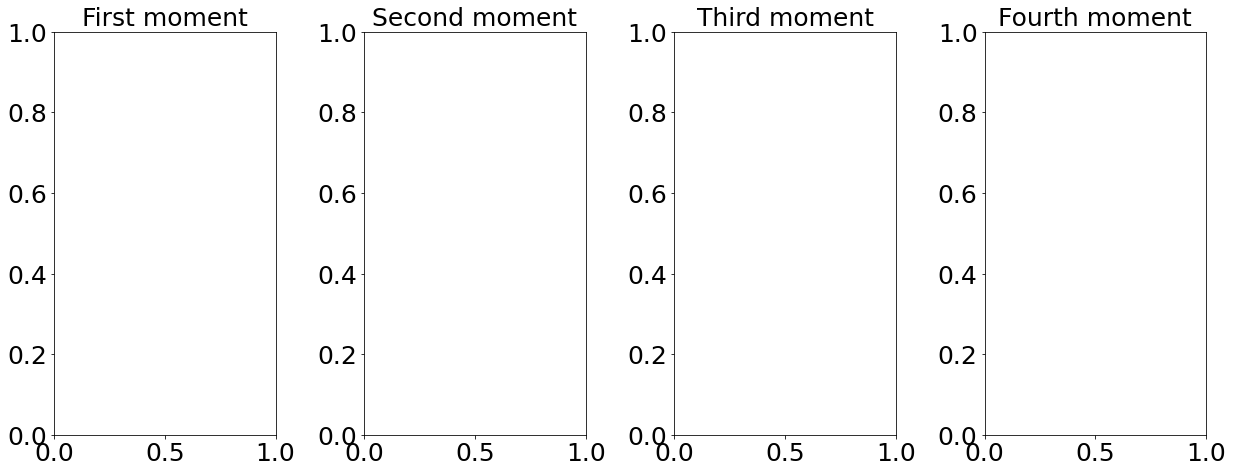

In [4]:
# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/1d")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title("First moment",fontsize=font_size)
ax2.set_title("Second moment",fontsize=font_size)
ax3.set_title("Third moment",fontsize=font_size)
ax4.set_title("Fourth moment",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("noada_moment1.txt"))
mom2_list=np.hstack(openCfile("noada_moment2.txt"))
mom3_list=np.hstack(openCfile("noada_moment3.txt"))
mom4_list=np.hstack(openCfile("noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)
